<a href="https://colab.research.google.com/github/221sakshisharma/coursera-ML-work/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

%matplotlib inline

#Loading the Drug Prescription Dataset

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


#EDA and Preprocessing

In [ ]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

Text(0.5, 1.0, 'Distribution of Drug Category')

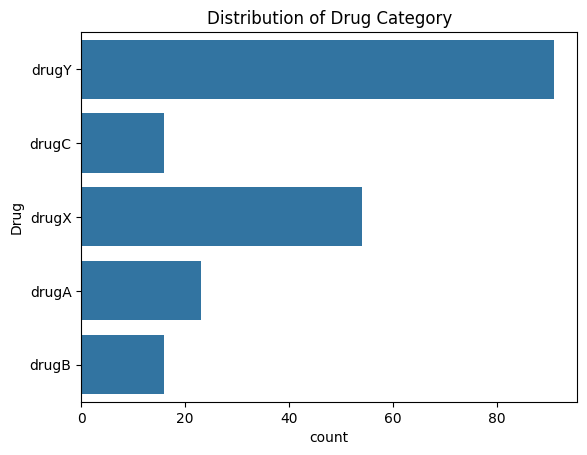

In [ ]:
sns.countplot(y='Drug', data=df)
plt.title('Distribution of Drug Category')

In [ ]:
df.isnull().sum(axis=0)

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


##Label Encoder

* Label Encoding is used for categorical data when they have logical order (Low < Medium < High) as models may assume ordinal relationship (Green > Red), which is not true for nominal categories.
* One Hot Encoding is suitable for nominal categories (color, name, city).

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [ ]:
class_names = df['Drug'].astype('category').cat.categories
class_names

Index(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype='object')

In [ ]:
category_mapping = dict(enumerate(df['Drug'].astype('category').cat.categories))
category_mapping

{0: 'drugA', 1: 'drugB', 2: 'drugC', 3: 'drugX', 4: 'drugY'}

In [ ]:
df['Drug'] = df['Drug'].astype('category').cat.codes

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [ ]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


<Axes: >

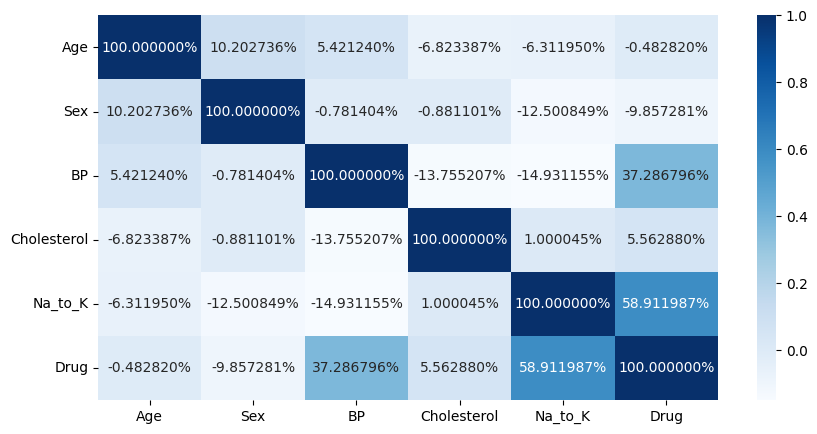

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt="%",
    cmap='Blues',
)

In [ ]:
X = df.drop('Drug', axis=1)
y = df['Drug']

#Modelling

##Splitting Data into Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify=y)

##Training the Decision Tree

In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

##Evaluation

In [ ]:
y_pred = drugTree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

##Visualization

In [ ]:
X.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

[Text(0.625, 0.9, 'Na_to_K <= 14.829\nentropy = 1.961\nsamples = 140\nvalue = [16, 11, 11, 38, 64]\nclass = drugY'),
 Text(0.5, 0.7, 'BP <= 0.5\nentropy = 1.78\nsamples = 76\nvalue = [16, 11, 11, 38, 0]\nclass = drugX'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'Age <= 50.0\nentropy = 0.975\nsamples = 27\nvalue = [16, 11, 0, 0, 0]\nclass = drugA'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]\nclass = drugA'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]\nclass = drugB'),
 Text(0.75, 0.5, 'BP <= 1.5\nentropy = 0.768\nsamples = 49\nvalue = [0, 0, 11, 38, 0]\nclass = drugX'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\nentropy = 0.99\nsamples = 25\nvalue = [0.0, 0.0, 11.0, 14.0, 0.0]\nclass = drugX'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]\nclass = drugC'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 14\nvalue = [0, 0, 0, 14, 0]\nclass = drugX'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 24\nvalue =

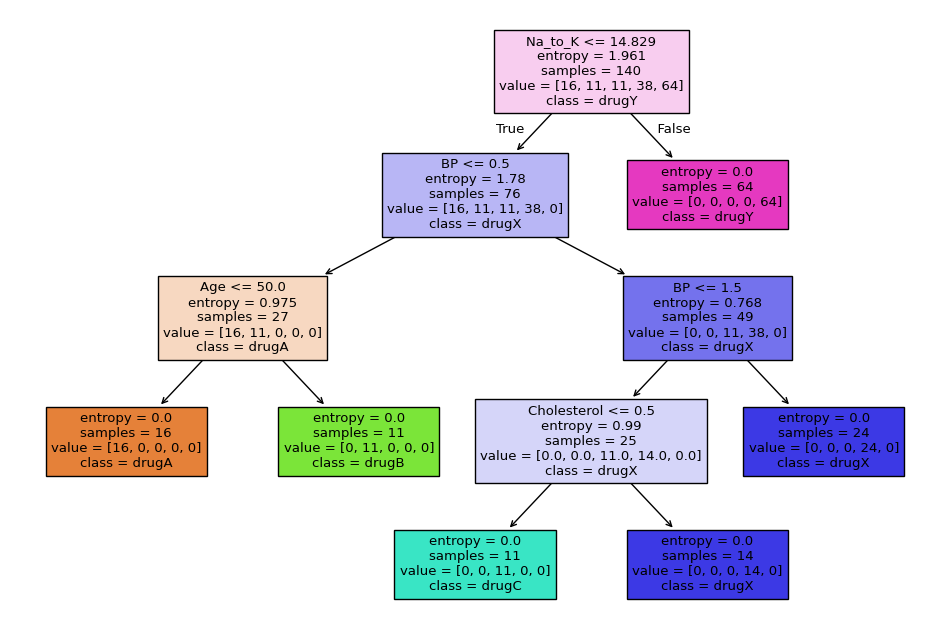

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(drugTree, feature_names=X.columns, class_names=class_names, filled=True)

#Deployment Test

In [ ]:
from google.colab import userdata
userdata

<module 'google.colab.userdata' from '/usr/local/lib/python3.11/dist-packages/google/colab/userdata.py'>

In [ ]:
!pip install joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(drugTree, "model.joblib")

['model.joblib']